## PIZZA SALES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

### Import Raw Data

In [2]:
df = pd.read_excel(r"C:\Users\HP\Downloads\pizza_sales.csv.xlsx")

### MetaData of Raw Data

In [12]:
df.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7,3,ital_supr_m,1,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8,3,prsc_argla_l,1,2015-01-01,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9,4,ital_supr_m,1,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10,5,ital_supr_m,1,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [16]:
df.tail(15)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48605,48606,21345,classic_dlx_s,1,2015-12-31,20:44:43,12.00,12.00,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
48606,48607,21345,spin_pesto_m,1,2015-12-31,20:44:43,16.50,16.50,M,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat...",The Spinach Pesto Pizza
48607,48608,21346,big_meat_s,1,2015-12-31,20:51:07,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
48608,48609,21346,cali_ckn_m,1,2015-12-31,20:51:07,16.75,16.75,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
48609,48610,21346,cali_ckn_s,1,2015-12-31,20:51:07,12.75,12.75,S,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
48610,48611,21346,soppressata_l,1,2015-12-31,20:51:07,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
48611,48612,21347,bbq_ckn_m,1,2015-12-31,21:14:37,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
48612,48613,21347,ital_supr_m,1,2015-12-31,21:14:37,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
48613,48614,21347,peppr_salami_s,1,2015-12-31,21:14:37,12.50,12.50,S,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
48614,48615,21347,southw_ckn_l,1,2015-12-31,21:14:37,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza


In [17]:
print("The metadata of the dataset ", df.shape)

The metadata of the dataset  (48620, 12)


In [18]:
print("The Rows of the dataset ", df.shape[0])

The Rows of the dataset  48620


In [19]:
print("The columns of the dataset ", df.shape[1])

The columns of the dataset  12


In [20]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [22]:
df.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_categor

### Data Types in Raw Data

In [23]:
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [24]:
df.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


### KPI's 

In [31]:
Total_revenue = df["total_price"].sum()
Total_pizzas_sold = df["quantity"].sum()
Total_orders = df["order_id"].nunique()

avg_order_value = Total_revenue / Total_orders
avg_pizzas_per_order = Total_pizzas_sold / Total_orders

print(f"Total revenue $ {Total_revenue:,.2f}")
print(f"Total pizzas sold {Total_pizzas_sold:,}")
print(f"Total orders {Total_orders:,}")
print(f"Avg order value $ {avg_order_value:,.2f}")
print(f"Average pizzas per order {avg_pizzas_per_order:.2f}")

Total revenue $ 817,860.05
Total pizzas sold 49,574
Total orders 21,350
Avg order value $ 38.31
Average pizzas per order 2.32


### Ingredient Analysis

In [9]:
ingredient = (
    df["pizza_ingredients"]
      .str.split(",")
      .explode()
      .str.strip()
      .value_counts()
      .reset_index()
      .rename(columns={"index":"count","pizza_ingredients":"ingredient"})
)

print(ingredient.head(15))


           ingredient  count
0              Garlic  27422
1            Tomatoes  26601
2          Red Onions  19547
3         Red Peppers  16284
4   Mozzarella Cheese  10333
5           Pepperoni  10300
6             Spinach  10012
7           Mushrooms   9624
8             Chicken   8443
9           Capocollo   6572
10       Green Olives   6174
11         Artichokes   5682
12   Jalapeno Peppers   5643
13      Green Peppers   5224
14        Feta Cheese   4748


#### Daily Trend - Total Orders

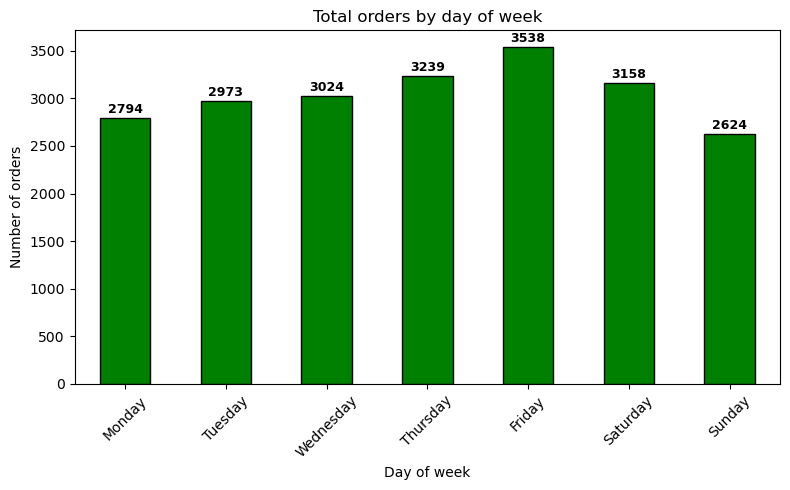

In [6]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True)

df["day_name"] = df["order_date"].dt.day_name()

weekday_order = [
    "Monday","Tuesday","Wednesday",
    "Thursday","Friday","Saturday","Sunday"
]

df["day_name"] = pd.Categorical(
    df["day_name"],
    categories=weekday_order,
    ordered=True
)

orders_by_day = df.groupby("day_name", observed=False)["order_id"].nunique()

ax = orders_by_day.plot(
    kind="bar",
    figsize=(8,5),
    color="green",
    edgecolor="black"
)

plt.title("Total orders by day of week")
plt.xlabel("Day of week")
plt.ylabel("Number of orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val),
             ha="center", va="bottom",
             fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


#### Daily Trend - Total Revenue

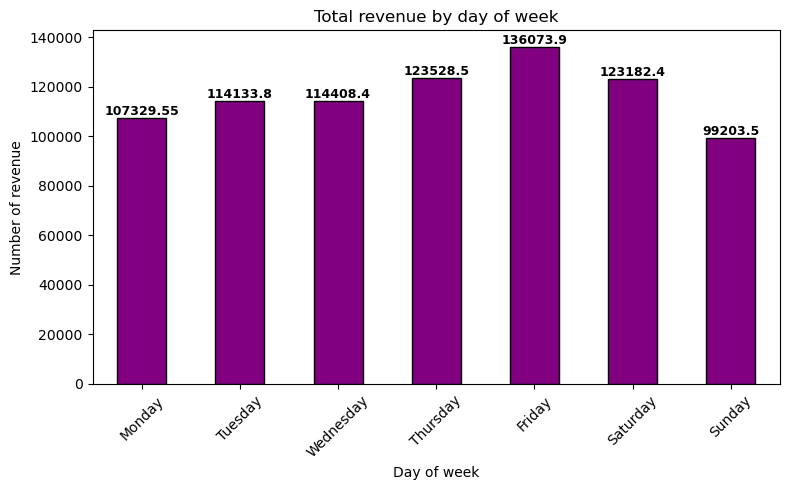

In [4]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True)

df["day_name"] = df["order_date"].dt.day_name()

weekday_order = [
    "Monday","Tuesday","Wednesday",
    "Thursday","Friday","Saturday","Sunday"
]

df["day_name"] = pd.Categorical(
    df["day_name"],
    categories=weekday_order,
    ordered=True
)

orders_by_day = df.groupby("day_name", observed=False)["total_price"].sum()

ax = orders_by_day.plot(
    kind="bar",
    figsize=(8,5),
    color="purple",
    edgecolor="black"
)

plt.title("Total revenue by day of week")
plt.xlabel("Day of week")
plt.ylabel("Number of revenue")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val + 20, str(val),
             ha="center", va="bottom",
             fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


#### Hourly Trend - Total Orders

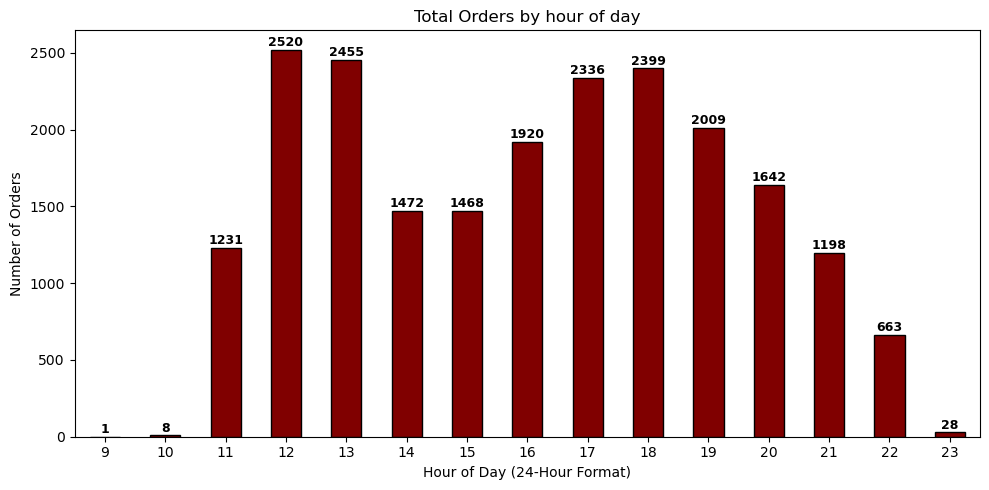

In [8]:
df["order_time"] = pd.to_datetime(df["order_time"], format="%H:%M:%S")

df["order_hour"] = df["order_time"].dt.hour

orders_by_hour = df.groupby("order_hour", observed=False)["order_id"].nunique()

ax = orders_by_hour.plot(
    kind="bar",
    figsize=(10,5),
    color="maroon",
    edgecolor="black"
)

plt.title("Total Orders by hour of day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
    plt.text(i, val + 5, str(val),
             ha="center", va="bottom",
             fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


#### Monthly Trend - Total Orders

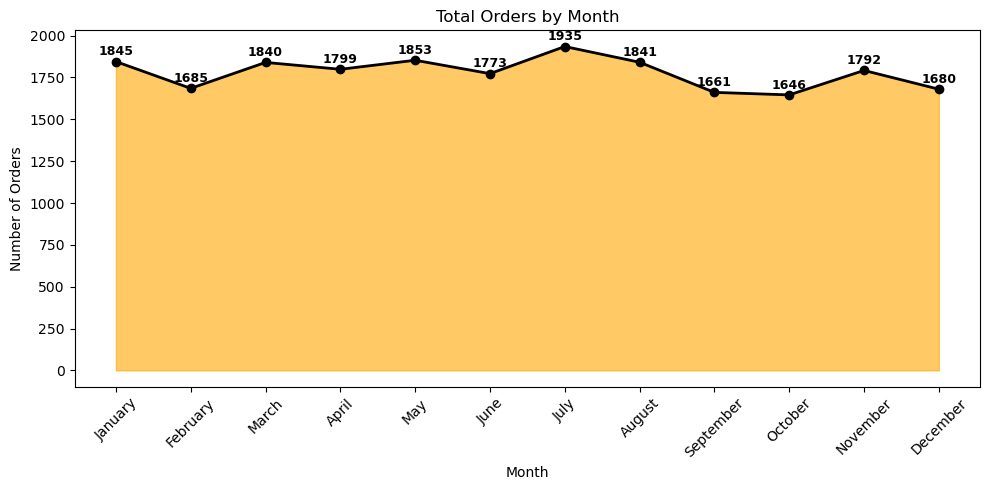

In [10]:
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True)

df["month_name"] = df["order_date"].dt.month_name()

month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

df["month_name"] = pd.Categorical(
    df["month_name"],
    categories=month_order,
    ordered=True
)

orders_by_month = df.groupby("month_name", observed=False)["order_id"].nunique()

plt.figure(figsize=(10,5))
plt.fill_between(
    orders_by_month.index,
    orders_by_month.values,
    color="orange",
    alpha=0.6
)
plt.plot(
    orders_by_month.index,
    orders_by_month.values,
    color="black",
    linewidth=2,
    marker="o"
)

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_month):
    plt.text(
        i, val + 20, str(val),
        ha="center", va="bottom",
        fontsize=9, fontweight="bold"
    )

plt.tight_layout()
plt.show()


#### % of Sales by Category

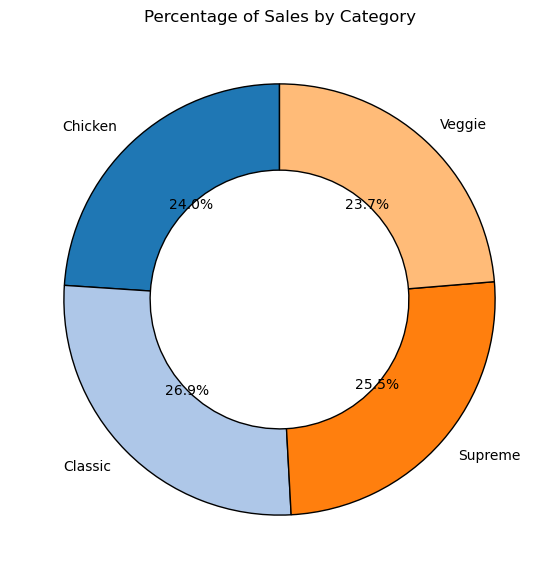

In [12]:
category_sales = df.groupby("pizza_category")["total_price"].sum()

category_pct = (category_sales / category_sales.sum()) * 100

plt.figure(figsize=(7,7))
colors = plt.get_cmap("tab20").colors

plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black", "width": 0.4}
)

plt.title("Percentage of Sales by Category")
plt.show()


#### %Sales by Pizza Size & Category

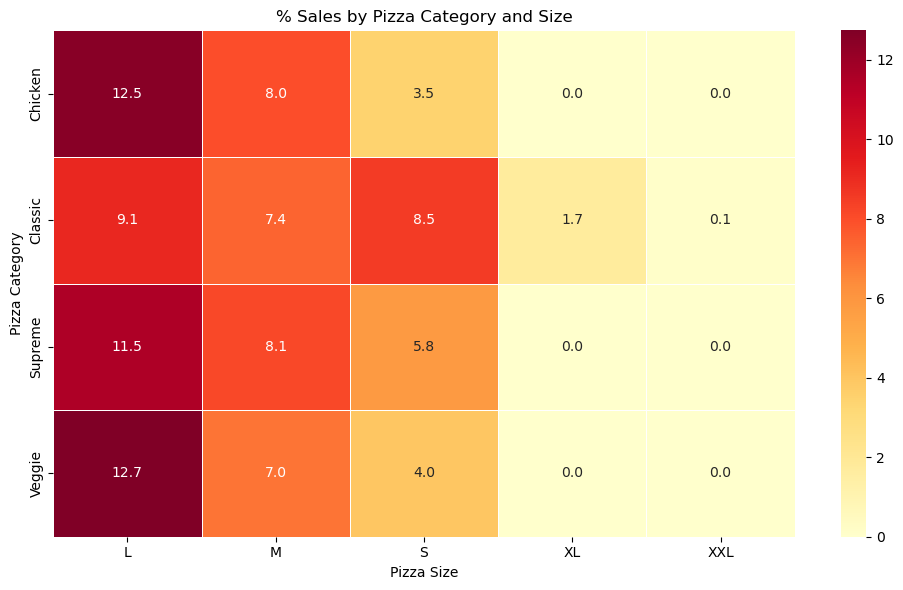

In [16]:
sales_pivot = df.pivot_table(
    index="pizza_category",
    columns="pizza_size",
    values="total_price",
    aggfunc="sum",
    fill_value=0
)

sales_pct = (sales_pivot / sales_pivot.sum().sum()) * 100

plt.figure(figsize=(10,6))
sns.heatmap(
    sales_pct,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("% Sales by Pizza Category and Size")
plt.xlabel("Pizza Size")
plt.ylabel("Pizza Category")
plt.tight_layout()
plt.show()


#### Total Pizza Sold by Pizza Category

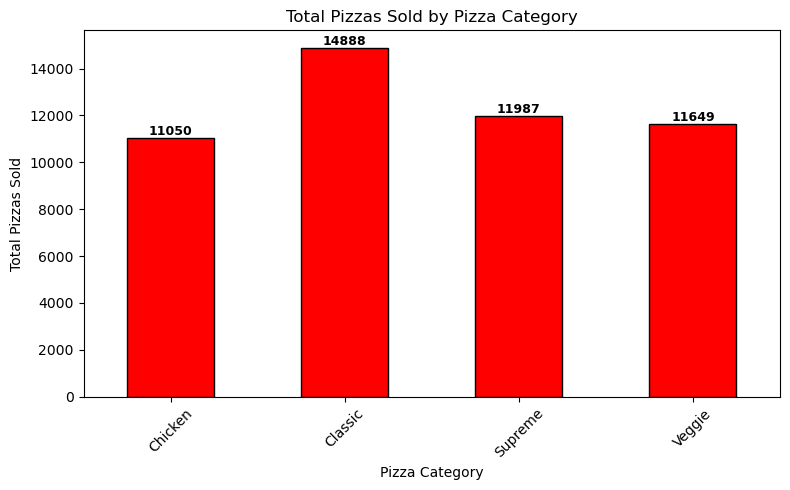

In [20]:
pizzas_by_category = df.groupby("pizza_category")["quantity"].sum()

ax = pizzas_by_category.plot(
    kind="bar",
    figsize=(8,5),
    color="red",
    edgecolor="black"
)

plt.title("Total Pizzas Sold by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(pizzas_by_category):
    plt.text(
        i, val + 5, str(val),
        ha="center", va="bottom",
        fontsize=9, fontweight="bold"
    )

plt.tight_layout()
plt.show()




#### Top 5 Best-Selling Pizzas - Total Qty

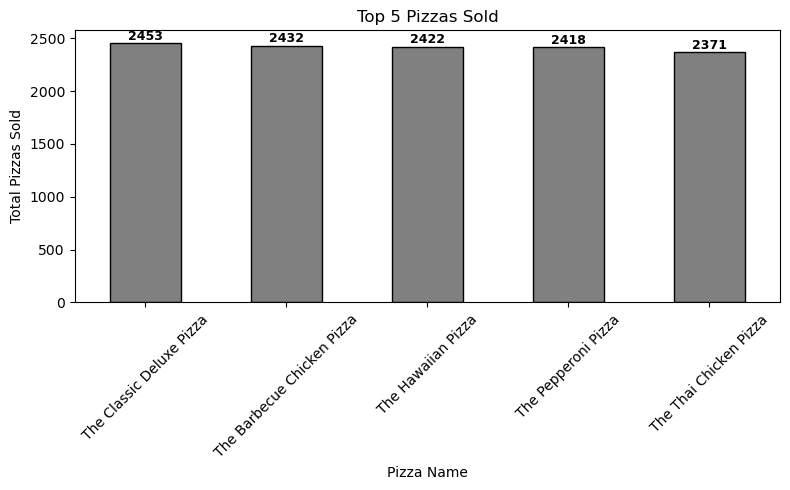

In [22]:
pizzas_by_name = df.groupby("pizza_name")["quantity"].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(
    kind="bar",
    figsize=(8,5),
    color="grey",
    edgecolor="black"
)

plt.title("Top 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(
        i, val + 2, str(val),
        ha="center", va="bottom",
        fontsize=9, fontweight="bold"
    )

plt.tight_layout()
plt.show()


#### Top 5 Best-Selling Pizzas - Total Orders

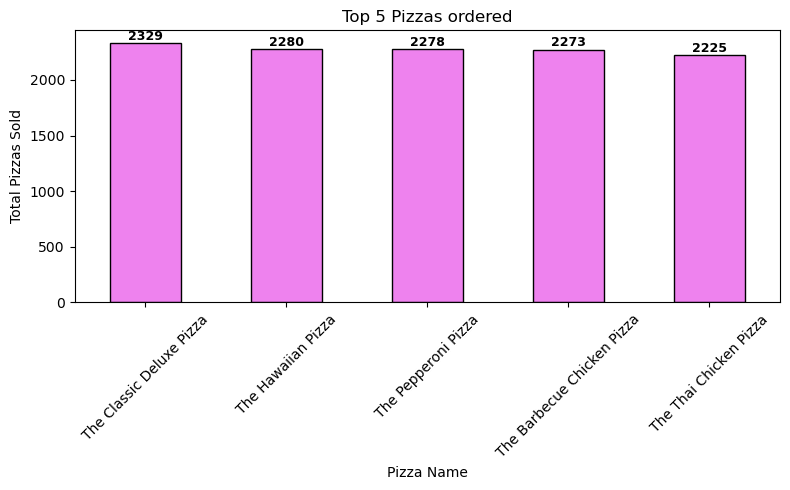

In [24]:
pizzas_by_name = df.groupby("pizza_name")["order_id"].nunique()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(kind="bar",figsize=(8,5),color="violet",edgecolor="black")
plt.title("Top 5 Pizzas ordered")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(i, val + 2, str(val),ha="center", va="bottom",fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


#### Top 5 Best-Selling Pizzas - Total Sales

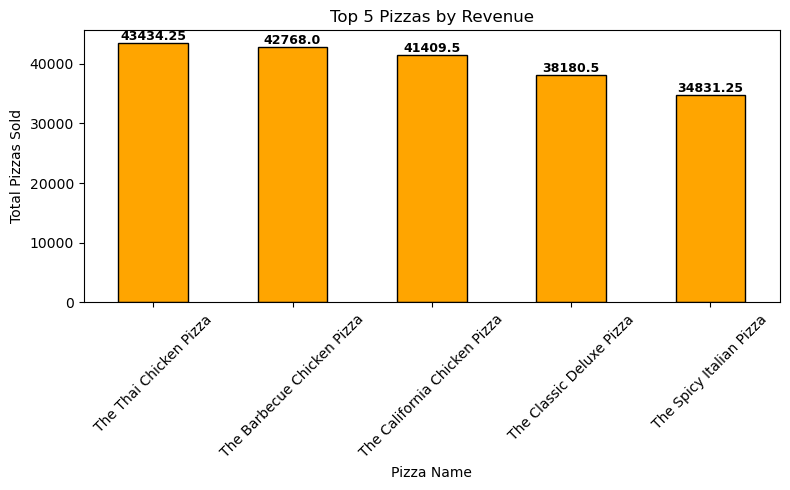

In [26]:
pizzas_by_name = df.groupby("pizza_name")["total_price"].sum()

top5 = pizzas_by_name.sort_values(ascending=False).head(5)

ax = top5.plot(
    kind="bar",
    figsize=(8,5),
    color="orange",
    edgecolor="black"
)

plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)

for i, val in enumerate(top5):
    plt.text(
        i, val + 2, str(val),
        ha="center", va="bottom",
        fontsize=9, fontweight="bold"
    )

plt.tight_layout()
plt.show()


#### Bottom 5 Best-Selling Pizzas - Total Sales

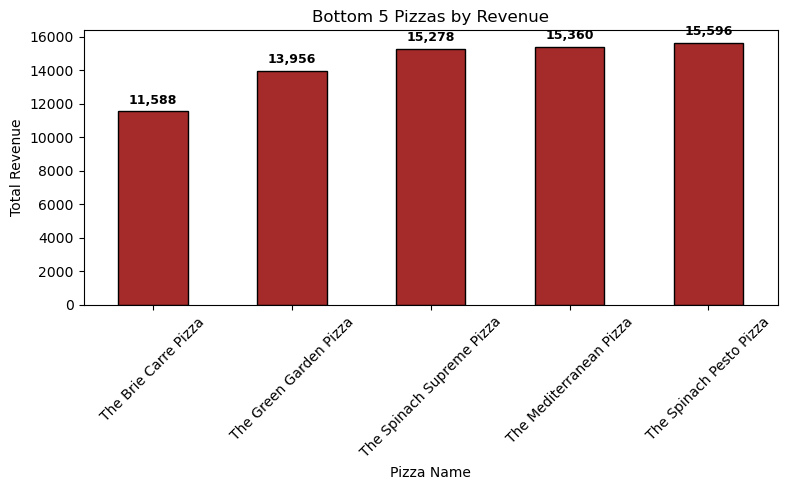

In [30]:
pizzas_by_name = df.groupby("pizza_name")["total_price"].sum()

bottom5 = pizzas_by_name.sort_values(ascending=True).head(5)

ax = bottom5.plot(
    kind="bar",
    figsize=(8,5),
    color="brown",
    edgecolor="black"
)

plt.title("Bottom 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(bottom5):
    plt.text(
        i, val + (0.02 * val),
        f"{val:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()
